##Decision Tree:
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
##Naïve Bayesian:
In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with Kernel density estimation, they can achieve higher accuracy levels.


#Let’s Code:

1st we know about the type of data and how many columns and value that we use here.

##Attribute information:
*	age - age in years
*	sex - (1 = male; 0 = female)
*	cp - chest pain type
*	trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*	chol - serum cholestoral in mg/dl
*	fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*	restecg - resting electrocardiographic results
*	thalach - maximum heart rate achieved
*	exang - exercise induced angina (1 = yes; 0 = no)
*	oldpeak - ST depression induced by exercise relative to rest
*	slope - the slope of the peak exercise ST segment
*	ca - number of major vessels (0-3) colored by flourosopy
*	thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
*	target - have disease or not (1=yes, 0=no)


## <font size=5> <strong>Naive Bayes & Decision tree on Heart disease dataset in python
 

## I. Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heartdisease1.csv', 'sample_data']


## II. Importing and understanding our dataset 

In [ ]:
# import heartdisease dataset
dataset = pd.read_csv("heartdisease1.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
# Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
# Shape of dataset
dataset.shape

(1328, 14)

#### Printing out a few columns

In [ ]:
# Printing out a few columns
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
237,57,1,1,124.0,261.0,0,1,141.0,0,0.3,2,0,3,0
107,62,1,1,120.0,281.0,0,0,103.0,0,1.4,1,1,3,0
127,53,1,2,130.0,197.0,1,0,152.0,0,1.2,0,0,2,1
204,66,0,2,146.0,278.0,0,0,152.0,0,0.0,1,1,2,1
868,56,1,1,120.0,240.0,0,1,169.0,0,0.0,0,0,2,1


#### Description

In [ ]:
# Description
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.000000,1328.000000,1328.000000,1327.000000,1327.000000,1328.000000,1328.000000,1326.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,54.418675,0.692771,0.948042,131.599096,246.069329,0.149096,0.529367,149.288839,0.334337,1.064232,1.388554,0.748494,2.321536,0.520331
std,9.071150,0.461519,1.029854,17.512648,51.645923,0.356318,0.527220,22.932820,0.471936,1.171519,0.617203,1.028603,0.618543,0.499775
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1327 non-null   float64
 4   chol      1327 non-null   float64
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1326 non-null   float64
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 145.4 KB


In [ ]:
###Luckily, we have no missing values

In [ ]:
# check whether their is null values or not
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        1
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# need to fill the null values
dataset = dataset.fillna(dataset.median())
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Let's understand our columns better:

In [ ]:
# Let's understand our columns better:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [ ]:
# Analysing the 'target' variable
dataset["target"].describe()

count    1328.000000
mean        0.520331
std         0.499775
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
# unique value in target columns (will have only 0 &1 )
dataset["target"].unique()

array([0, 1])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
# Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.437802
oldpeak     0.436815
cp          0.434704
thalach     0.421219
ca          0.384375
slope       0.345709
thal        0.339286
sex         0.280008
age         0.228442
trestbps    0.139202
restecg     0.135011
chol        0.096608
fbs         0.038194
Name: target, dtype: float64


In [ ]:
This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## III. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
# shape of X_train
X_train.shape

(1062, 13)

In [ ]:
# shape of Y_test
X_test.shape

(266, 13)

In [ ]:
# shape of Y_train
Y_train.shape

(1062,)

In [ ]:
# shape of X_test
Y_test.shape

(266,)

In [ ]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
# check the shape of predicted 
Y_pred_nb.shape

(266,)

In [ ]:
score_nb = round(accuracy_score(Y_test,Y_pred_nb)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 81.95 %


In [ ]:
# make confusion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred_nb))

[[103  31]
 [ 17 115]]


### Confusion matrix
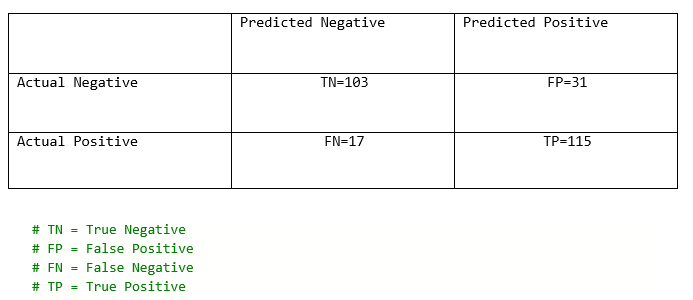

In [ ]:
# check the precision of model
from sklearn.metrics import precision_score
# precision: tp / (tp + fp)
precision = precision_score(Y_test,Y_pred_nb)
print('Precision: %f' % precision)

Precision: 0.787671


In [ ]:
# calculate the recall of model
from sklearn.metrics import recall_score
# recall: tp / (tp + fn)
recall = recall_score(Y_test,Y_pred_nb)
print('Recall: %f' % recall)

Recall: 0.871212


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
# shape of prediction column
print(Y_pred_dt.shape)

(266,)


In [ ]:
score_dt = round(accuracy_score(Y_test,Y_pred_dt)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [ ]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred_dt)

array([[134,   0],
       [  0, 132]])

## Confusion matrix
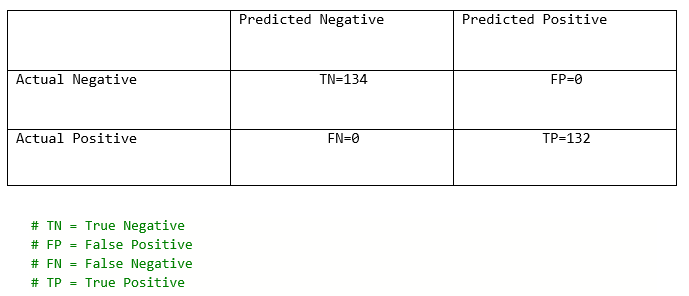

In [ ]:
# calculate precision of model
from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred_dt)
print('Precision: %f' % precision)

Precision: 1.000000


In [ ]:
# calculate Recall of medol
from sklearn.metrics import recall_score
recall = recall_score(Y_test,Y_pred_dt)
print('Recall: %f' % recall)

Recall: 1.000000
